# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)

cities

['inirida',
 'ushuaia',
 'tuktoyaktuk',
 'rikitea',
 'pascagoula',
 'vaini',
 'hermanus',
 'baykit',
 'karwar',
 'barrow',
 'busselton',
 'ponta do sol',
 'humaita',
 'saldanha',
 'tasiilaq',
 'cape town',
 'butaritari',
 'kenai',
 'umm lajj',
 'punta arenas',
 'ambovombe',
 'esperance',
 'phnum penh',
 'waipawa',
 'hobart',
 'bredasdorp',
 'puerto ayora',
 'coihaique',
 'porto novo',
 'hilo',
 'baturaja',
 'pangoa',
 'airai',
 'necochea',
 'afua',
 'padang',
 'inhambane',
 'ruteng',
 'kieta',
 'severo-kurilsk',
 'umzimvubu',
 'kirksville',
 'mys shmidta',
 'tasbuget',
 'saleaula',
 'chernyshevskiy',
 'kodiak',
 'atuona',
 'attawapiskat',
 'pimenta bueno',
 'castro',
 'jamestown',
 'geraldton',
 'gua musang',
 'yulara',
 'lavras',
 'port alfred',
 'cairns',
 'preobrazheniye',
 'galesong',
 'rockhampton',
 'hobyo',
 'dromolaxia',
 'inta',
 'murgab',
 'provideniya',
 'pudozh',
 'itarema',
 'omsukchan',
 'bluff',
 'yerofey pavlovich',
 'talnakh',
 'upernavik',
 'abnub',
 'wynyard',
 'canb

In [56]:
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
column_df = pd.DataFrame(columns = column_names)
cities_df = pd.DataFrame(cities)
combined_df = pd.concat([column_df, cities_df])
# cities_df.head()
combined_df.head()

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inirida
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushuaia
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tuktoyaktuk
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rikitea
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pascagoula


In [57]:
len (cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [59]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=inirida
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ushuaia
Processing Record 3 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=tuktoyaktuk
Processing Record 4 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=rikitea
Processing Record 5 | Pascagoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=pascagoula
Processing Record 6 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=vaini
Processing Record 7 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 57 | Dromolaxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=dromolaxia
Processing Record 58 | Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=inta
Processing Record 59 | Murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=murgab
Processing Record 60 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=provideniya
Processing Record 61 | Pudozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=pudozh
Processing Record 62 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=itarema
Processing Record 63 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=omsukcha

Processing Record 113 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=qaanaaq
Processing Record 114 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=carutapera
Processing Record 115 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=sambava
City not found. Skipping...
Processing Record 116 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=mogadishu
Processing Record 117 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=bathsheba
Processing Record 118 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=norman wells
Processing Record 119 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 168 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=christchurch
Processing Record 169 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=pangnirtung
Processing Record 170 | Gimli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=gimli
Processing Record 171 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=new norfolk
Processing Record 172 | Yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=yarmouth
City not found. Skipping...
Processing Record 173 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=aykhal
Processing Record 174 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 223 | Ankang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ankang
Processing Record 224 | Khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=khandyga
Processing Record 225 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=noumea
Processing Record 226 | Nago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=nago
City not found. Skipping...
Processing Record 227 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=mahebourg
Processing Record 228 | Le Port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=le port
City not found. Skipping...
City not found. Skipping...
Processing Record 229 | Owensboro
http://api.openweathermap.or

Processing Record 278 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ucluelet
Processing Record 279 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=atar
Processing Record 280 | Kerman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=kerman
Processing Record 281 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=walvis bay
Processing Record 282 | Sao Gabriel da Cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=sao gabriel da cachoeira
Processing Record 283 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ginda
Processing Record 284 | Milkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357

Processing Record 334 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=cap malheureux
Processing Record 335 | Rome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=roma
Processing Record 336 | Vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=vila
Processing Record 337 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=cabedelo
Processing Record 338 | Tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=tutoia
Processing Record 339 | Monchegorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=monchegorsk
Processing Record 340 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q

City not found. Skipping...
Processing Record 390 | Mogilno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=mogilno
Processing Record 391 | Pandamatenga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=pandamatenga
Processing Record 392 | Ottawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ottawa
Processing Record 393 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=soyo
Processing Record 394 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=maragogi
Processing Record 395 | Lagos de Moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=lagos de moreno
Processing Record 396 | Tabuleiro do Norte
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 446 | Magsalangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=magsalangi
Processing Record 447 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=klyuchi
Processing Record 448 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=beringovskiy
Processing Record 449 | Nizhniy Kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=nizhniy kuranakh
Processing Record 450 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=tromso
City not found. Skipping...
Processing Record 451 | Madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=madang
City not found. Skipping...
Processing Record 452 | Galbshtadt
http://api.openweathe

Processing Record 501 | Cao Bang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=cao bang
Processing Record 502 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=port macquarie
Processing Record 503 | Knoxville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=knoxville
Processing Record 504 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=kutum
Processing Record 505 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=ulaangom
Processing Record 506 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e641fdce8c7f8423d56d&q=cockburn town
Processing Record 507 | Baiyin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cf4fc714c357e

In [62]:
# Create a dictonary with the lists generated
dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data_df = pd.DataFrame(dict)

# Display count of weather data values 
weather_data_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.


* Display the DataFrame

In [64]:
# Output File (CSV)
weather_data = "output_data/cities.csv"

weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Inirida,24,CO,1547873539,98,3.87,-67.92,72.53,1.81
1,Ushuaia,40,AR,1547870400,54,-54.81,-68.31,57.20,14.99
2,Tuktoyaktuk,5,CA,1547870400,70,69.44,-133.03,-4.01,21.92
3,Rikitea,92,PF,1547873543,98,-23.12,-134.97,80.27,15.23
4,Pascagoula,90,US,1547871300,86,30.37,-88.56,62.06,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

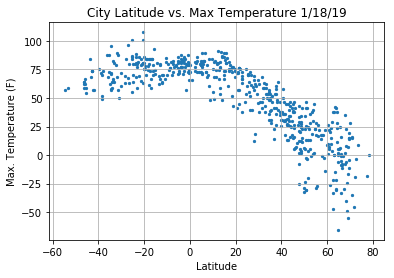

In [73]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", s=5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 1/18/19")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

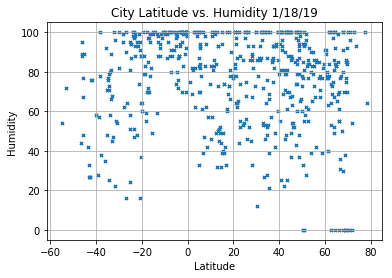

In [76]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "x", s = 10)

plt.title("City Latitude vs. Humidity 1/18/19")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

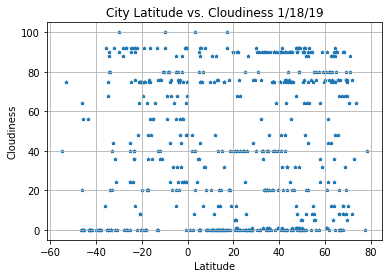

In [77]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker = "*", s = 10)

plt.title("City Latitude vs. Cloudiness 1/18/19")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

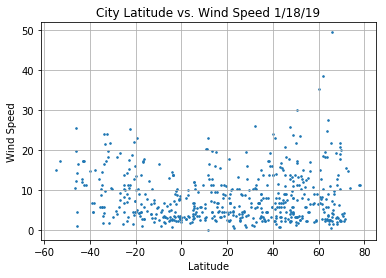

In [78]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker = ".", s = 10)

plt.title("City Latitude vs. Wind Speed 1/18/19")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig

# Show plot
plt.show()